Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.


Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.


The data & attributes information for this project is available at -   https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/Links to an external site.

The data consists of those diagnosed with Parkinson Disease and those who do not.


Steps to be followed:


1. Load the dataset
2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of
number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. (2.5 points)
3. Using univariate &amp; bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points)
4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test).
5. Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)
6. Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. (7.5 points)
7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points) 
8. Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline

## Question 1

Load the dataset

In [2]:
park = pd.read_csv('parkinsons.data') #Importing data
park.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


## Question 2

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. (2.5 points)

In [3]:
# shape
print(park.shape)

(195, 24)


In [4]:
# types of attributes
print(park.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [5]:
# status distribution
print(park.groupby('status').size())

status
0     48
1    147
dtype: int64


In [6]:
park.isnull().any()

name                False
MDVP:Fo(Hz)         False
MDVP:Fhi(Hz)        False
MDVP:Flo(Hz)        False
MDVP:Jitter(%)      False
MDVP:Jitter(Abs)    False
MDVP:RAP            False
MDVP:PPQ            False
Jitter:DDP          False
MDVP:Shimmer        False
MDVP:Shimmer(dB)    False
Shimmer:APQ3        False
Shimmer:APQ5        False
MDVP:APQ            False
Shimmer:DDA         False
NHR                 False
HNR                 False
status              False
RPDE                False
DFA                 False
spread1             False
spread2             False
D2                  False
PPE                 False
dtype: bool

In [7]:
park.isna().any()

name                False
MDVP:Fo(Hz)         False
MDVP:Fhi(Hz)        False
MDVP:Flo(Hz)        False
MDVP:Jitter(%)      False
MDVP:Jitter(Abs)    False
MDVP:RAP            False
MDVP:PPQ            False
Jitter:DDP          False
MDVP:Shimmer        False
MDVP:Shimmer(dB)    False
Shimmer:APQ3        False
Shimmer:APQ5        False
MDVP:APQ            False
Shimmer:DDA         False
NHR                 False
HNR                 False
status              False
RPDE                False
DFA                 False
spread1             False
spread2             False
D2                  False
PPE                 False
dtype: bool

## Question 3

Using univariate &amp; bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points)

In [8]:
# descriptions
park.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [9]:
# status distribution
print(park.groupby('status').size())

status
0     48
1    147
dtype: int64


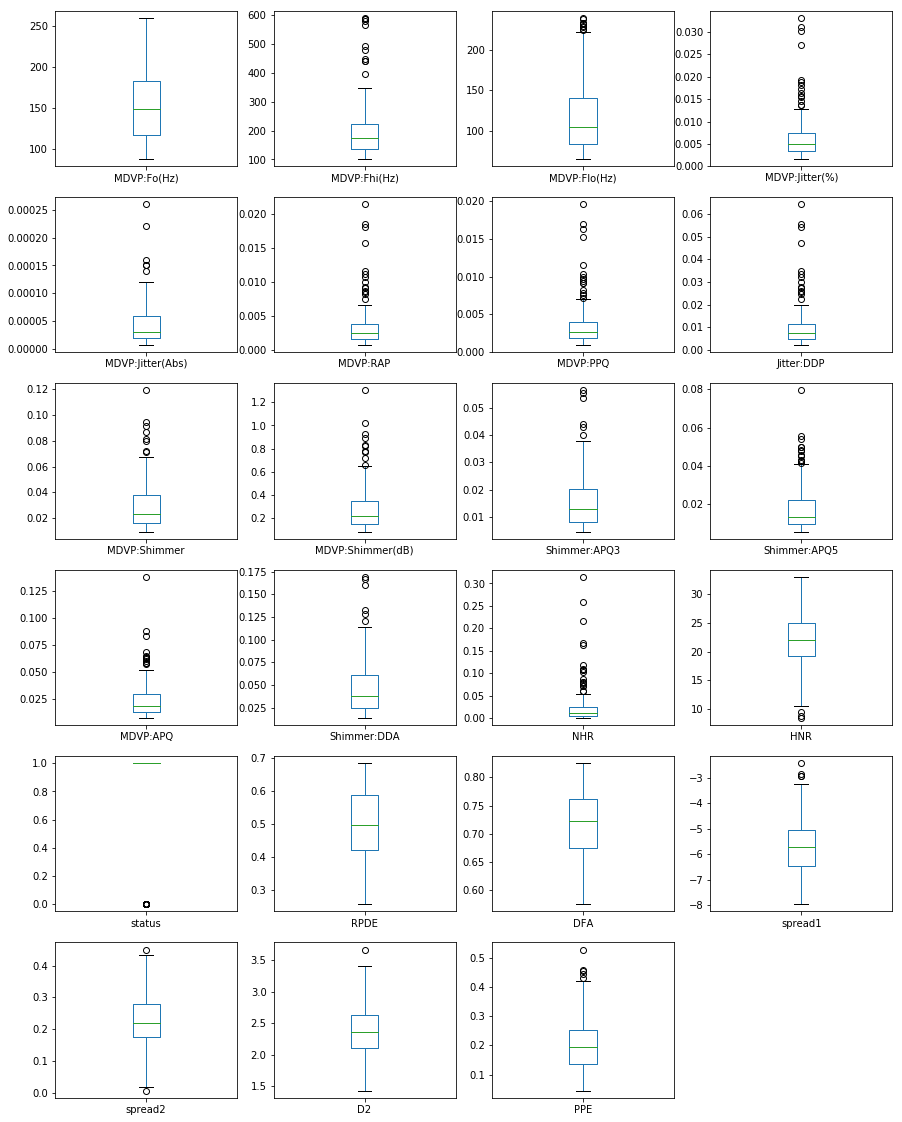

In [10]:
# box and whisker plots
park.plot(kind='box', subplots=True,layout = (6,4),sharex=False, sharey=False,figsize=(15,20))
plt.show()

##### Plotting heatmap to understand the relationhip between all variables specifically with target variable (here, status)

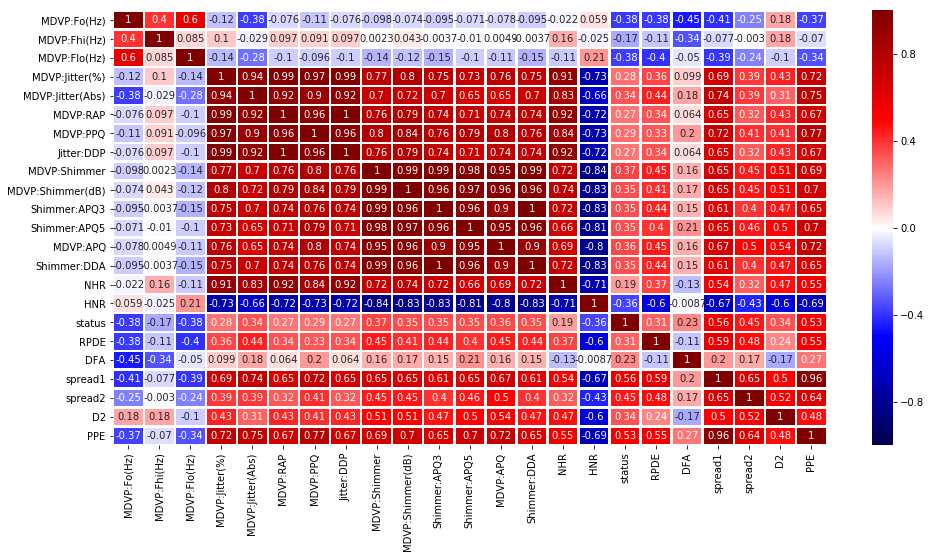

In [13]:
plt.figure(figsize = (16,8))
sns.heatmap(park.corr(), annot=True, vmin=-1, vmax=1, cmap='seismic', linewidths=1.5)

##### It can be observed that MDVP_Fo, MDVP_Flo and HNR are highly negatively correlated with status variable
##### Also, spread1, PPE and spread2 are highly positively correlated with status variable

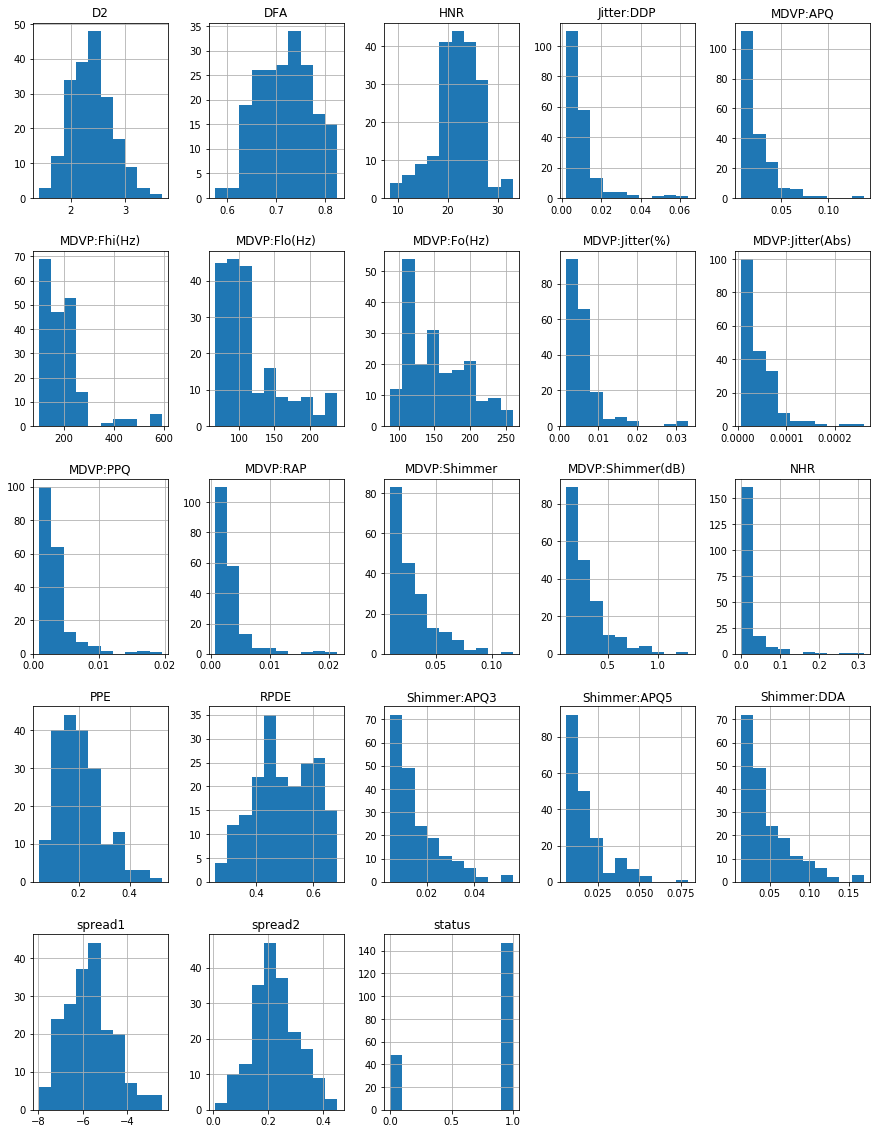

In [11]:
# histograms
park.hist(figsize=(15,20))
plt.show()

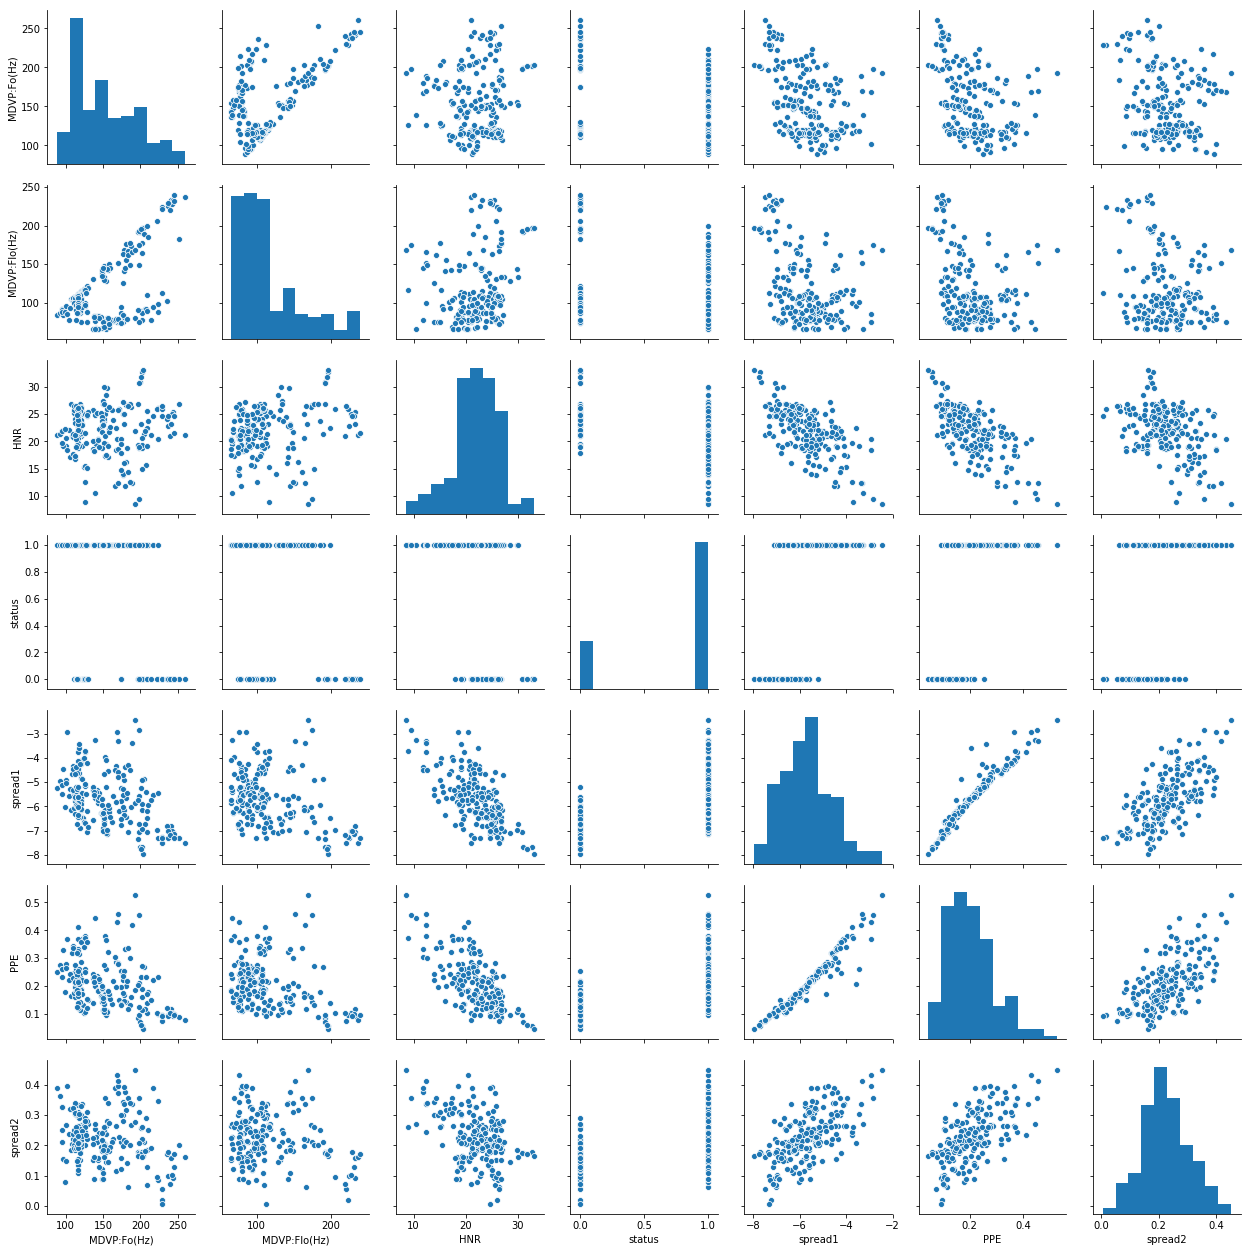

In [15]:
imp_variable_df = park[['MDVP:Fo(Hz)', 'MDVP:Flo(Hz)', 'HNR', 'status', 'spread1', 'PPE', 'spread2']]
sns.pairplot(data=imp_variable_df)

#### Variable PPE shares positive correlation with spread1 and spread2, whereas datapoint of spread2 is normally distributed
#### Moreover, varible HNR shares negative correlation with spread1 and PPE

## Question 4

Split the dataset into training and test set in the ratio of 70:30 (Training:Test).

In [18]:
# capture the target column ("status") into separate vectors for training set and test set
X = park.drop("status" , axis=1)
X = X.drop("name", axis=1)
y = park.pop("status")

In [19]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [20]:
#X_train, X_test, y_train, y_test
print('X_train.shape = ', X_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_train.shape = ', y_train.shape)
print('y_test.shape = ', y_test.shape)

X_train.shape =  (136, 22)
X_test.shape =  (59, 22)
y_train.shape =  (136,)
y_test.shape =  (59,)


## Question 5

Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Question 6

Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. (7.5 points)

In [22]:
y_predict=dt_model.predict(X_test)

In [23]:
print(dt_model.score(X_train, y_train))
print(dt_model.score(X_test, y_test))

1.0
0.8983050847457628


In [24]:
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.recall_score(y_test, y_predict))
print(metrics.precision_score(y_test, y_predict))
print(metrics.accuracy_score(y_test, y_predict))

[[14  5]
 [ 1 39]]
0.975
0.8863636363636364
0.8983050847457628


## Question 7

Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points)

In [25]:
park_reg_model = DecisionTreeClassifier(criterion = 'entropy', max_depth=7, min_samples_leaf=5 )
park_reg_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
y_reg_predict=park_reg_model.predict(X_test)
print(park_reg_model.score(X_train, y_train))
print(park_reg_model.score(X_test, y_test))

0.9705882352941176
0.9152542372881356


In [27]:
park_reg1_model = DecisionTreeClassifier(criterion = 'entropy', max_depth=7, min_samples_leaf=5, max_leaf_nodes=8)
park_reg1_model.fit(X_train, y_train)
y_reg1_predict=park_reg1_model.predict(X_test)
print(park_reg1_model.score(X_train, y_train))
print(park_reg1_model.score(X_test, y_test))

0.9705882352941176
0.8983050847457628


Accuracy Score at  1.0 is:  0.8135593220338984
Accuracy Score at  2.0 is:  0.7627118644067796
Accuracy Score at  3.0 is:  0.8135593220338984
Accuracy Score at  4.0 is:  0.8305084745762712
Accuracy Score at  5.0 is:  0.9152542372881356
Accuracy Score at  6.0 is:  0.864406779661017
Accuracy Score at  7.0 is:  0.8813559322033898
Accuracy Score at  8.0 is:  0.8983050847457628
Accuracy Score at  9.0 is:  0.8813559322033898
Accuracy Score at  10.0 is:  0.864406779661017
Accuracy Score at  11.0 is:  0.8983050847457628
Accuracy Score at  12.0 is:  0.9322033898305084
Accuracy Score at  13.0 is:  0.8983050847457628
Accuracy Score at  14.0 is:  0.8983050847457628
Accuracy Score at  15.0 is:  0.864406779661017
Accuracy Score at  16.0 is:  0.8813559322033898
Accuracy Score at  17.0 is:  0.8813559322033898
Accuracy Score at  18.0 is:  0.8983050847457628
Accuracy Score at  19.0 is:  0.8983050847457628
Accuracy Score at  20.0 is:  0.8983050847457628
Accuracy Score at  21.0 is:  0.8813559322033898
Accu

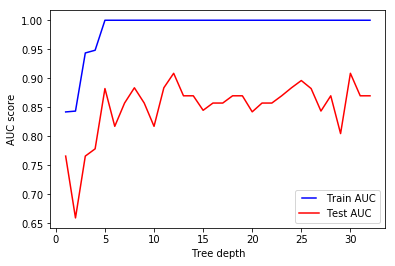

In [28]:
from sklearn.metrics import roc_curve, auc
max_depths = np.linspace(1, 32, 32, endpoint=True)

train_results = []
test_results = []
for max_depth in max_depths:
   dt_model3 = DecisionTreeClassifier(max_depth=max_depth)
   dt_model3.fit(X_train, y_train)
   train_pred = dt_model3.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt_model3.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
   print('Accuracy Score at ', max_depth, 'is: ', metrics.accuracy_score(y_test, y_pred))
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label = 'Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

###### It is clearly shown that model gradually learns on the initial stage when Tree Depth value is low but increasing the Tree depth value may casue overfitting

###### Let's try varying the min_samples_leafs

Accuracy Score at  0.1 is:  0.7966101694915254
Accuracy Score at  0.2 is:  0.8135593220338984
Accuracy Score at  0.30000000000000004 is:  0.7627118644067796
Accuracy Score at  0.4 is:  0.6779661016949152
Accuracy Score at  0.5 is:  0.6779661016949152


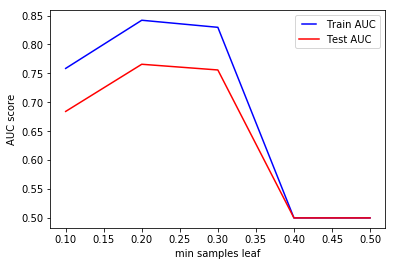

In [30]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   dtmodel4 = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
   dtmodel4.fit(X_train, y_train)
   train_pred = dtmodel4.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dtmodel4.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
   print('Accuracy Score at ',min_samples_leaf, 'is: ', metrics.accuracy_score(y_test, y_pred))

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

###### It is clearly shown that model gradually learns on the initial stage when Sample Leaf value is low but increasing the Sample Leaf value may casue underfitting

## Question 8

Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)

In [25]:
from sklearn.ensemble import RandomForestClassifier
#rfcl = RandomForestClassifier(n_estimators = 95, max_depth=7,min_samples_leaf=4 ,max_leaf_nodes=7)
rfcl = RandomForestClassifier(n_estimators = 50, max_depth=10, min_samples_leaf=5 )
rfcl = rfcl.fit(X_train, y_train)
y_rfcl_predict=rfcl.predict(X_test)
print(rfcl.score(X_train, y_train))
print(rfcl.score(X_test, y_test))

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.9632352941176471
0.8135593220338984


In [26]:
rfcl = RandomForestClassifier(n_estimators = 95, max_depth=7,min_samples_leaf=4 ,max_leaf_nodes=7)
rfcl = rfcl.fit(X_train, y_train)
y_rfcl_predict=rfcl.predict(X_test)
print(rfcl.score(X_train, y_train))
print(rfcl.score(X_test, y_test))

0.9632352941176471
0.8305084745762712


In [31]:
from sklearn.ensemble import RandomForestClassifier
estimators = np.arange(50,200,20)

for e in estimators:
    rfcl = RandomForestClassifier(n_estimators = e)
    rfcl = rfcl.fit(X_train, y_train)

    y_predict = rfcl.predict(X_test)
    print('Accuracy score for ', e, ' is: ', rfcl.score(X_test , y_test))
    print('Confusion Matrix for ', e, ' is: ', metrics.confusion_matrix(y_test, y_predict))

Accuracy score for  50  is:  0.864406779661017
Confusion Matrix for  50  is:  [[12  7]
 [ 1 39]]
Accuracy score for  70  is:  0.8305084745762712
Confusion Matrix for  70  is:  [[10  9]
 [ 1 39]]
Accuracy score for  90  is:  0.847457627118644
Confusion Matrix for  90  is:  [[11  8]
 [ 1 39]]
Accuracy score for  110  is:  0.8813559322033898
Confusion Matrix for  110  is:  [[12  7]
 [ 0 40]]
Accuracy score for  130  is:  0.864406779661017
Confusion Matrix for  130  is:  [[12  7]
 [ 1 39]]
Accuracy score for  150  is:  0.864406779661017
Confusion Matrix for  150  is:  [[11  8]
 [ 0 40]]
Accuracy score for  170  is:  0.847457627118644
Confusion Matrix for  170  is:  [[11  8]
 [ 1 39]]
Accuracy score for  190  is:  0.864406779661017
Confusion Matrix for  190  is:  [[11  8]
 [ 0 40]]


###### From above analysis we can say that 110 is the optimal number of trees that gives us the best result